In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, ensemble
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [2]:
flowers = pd.read_csv('./iris-data.csv')
flowers

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
flowers.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
flowers.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [6]:
flowers.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [7]:
flowers['petal_width_cm'].isnull().sum()

5

In [8]:
flowers.isnull().values.any()

True

In [9]:
flowers[flowers.isna().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [10]:
def missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_values_df


In [11]:
missing_percentage(flowers)

,column_name,percent_missing
sepal_length_cm,sepal_length_cm,0.000000
sepal_width_cm,sepal_width_cm,0.000000
petal_length_cm,petal_length_cm,0.000000
petal_width_cm,petal_width_cm,3.333333
class,class,0.000000


In [15]:
#Quitamos los valores NA
iris_clean= flowers.dropna()
iris_clean

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
iris_clean['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [17]:
# Cleaning names

iris_clean['class'] = iris_clean['class'].replace({'Iris-setossa' : 'Iris-setosa', 'versicolor' : 'Iris-versicolor'})

C:\Users\FVILLALOBOS\AppData\Local\Temp\ipykernel_13988\2396846618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_clean['class'] = iris_clean['class'].replace({'Iris-setossa' : 'Iris-setosa', 'versicolor' : 'Iris-versicolor'})


In [18]:
iris_clean['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
#Encoding
class1 = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris_clean['Coding class'] = iris_clean['class'].map(class1)
iris_clean

C:\Users\FVILLALOBOS\AppData\Local\Temp\ipykernel_13988\866798620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_clean['Coding class'] = iris_clean['class'].map(class1)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,Coding class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,2.3,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [27]:
flower_fin = iris_clean.drop('class', axis=1)
flower_fin
#Nos quedamos con los datos numericos

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Coding class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,2.3,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(flower_fin)
scaled_data

array([[6.43084767e-01, 6.25000000e-01, 6.77966102e-02, 4.16666667e-02,
        0.00000000e+00],
       [6.17590822e-01, 4.16666667e-01, 6.77966102e-02, 4.16666667e-02,
        0.00000000e+00],
       [5.92096877e-01, 5.00000000e-01, 5.08474576e-02, 4.16666667e-02,
        0.00000000e+00],
       [5.79349904e-01, 4.58333333e-01, 8.47457627e-02, 4.16666667e-02,
        0.00000000e+00],
       [6.30337795e-01, 6.66666667e-01, 6.77966102e-02, 4.16666667e-02,
        0.00000000e+00],
       [6.81325685e-01, 7.91666667e-01, 1.18644068e-01, 1.25000000e-01,
        0.00000000e+00],
       [5.79349904e-01, 5.83333333e-01, 6.77966102e-02, 8.33333333e-02,
        0.00000000e+00],
       [6.04843850e-01, 4.16666667e-01, 6.77966102e-02, 0.00000000e+00,
        0.00000000e+00],
       [7.19566603e-01, 4.16666667e-01, 1.69491525e-02, 0.00000000e+00,
        0.00000000e+00],
       [7.32313576e-01, 8.33333333e-01, 3.38983051e-02, 4.16666667e-02,
        0.00000000e+00],
       [7.19566603e-01, 1.0000

In [29]:
scaled_df = pd.DataFrame(scaled_data)
scaled_df.describe()

,0,1,2,3,4
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.715781,0.435920,0.480771,0.473563,0.517241
std,0.169094,0.181290,0.295416,0.314608,0.405748
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.643085,0.333333,0.101695,0.125000,0.000000
50%,0.732314,0.416667,0.576271,0.500000,0.500000
75%,0.808795,0.541667,0.694915,0.708333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
flowers_correlation = flower_fin.corr()
flowers_correlation

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Coding class
sepal_length_cm,1.000000,0.073926,0.480736,0.469734,0.462854
sepal_width_cm,0.073926,1.000000,-0.411939,-0.348464,-0.411677
petal_length_cm,0.480736,-0.411939,1.000000,0.958934,0.946206
petal_width_cm,0.469734,-0.348464,0.958934,1.000000,0.954491
Coding class,0.462854,-0.411677,0.946206,0.954491,1.000000


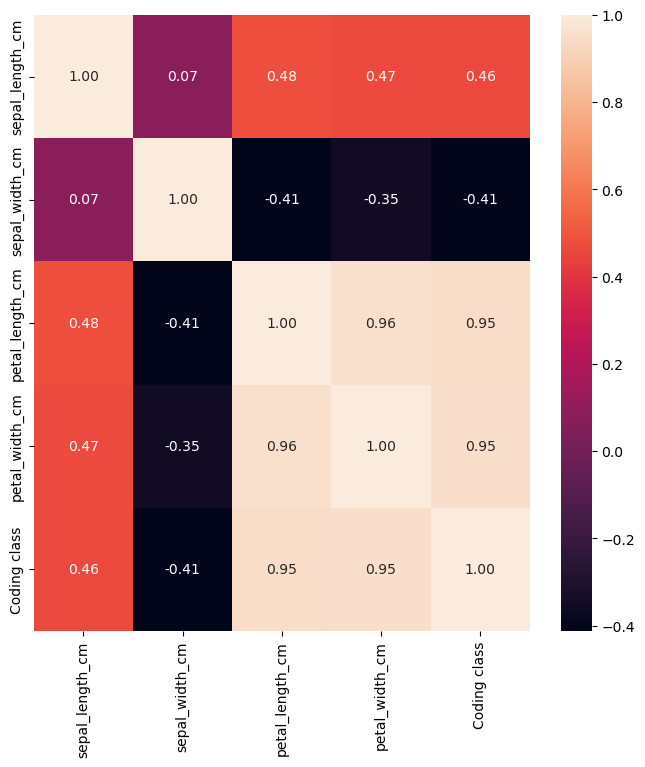

In [39]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(flower_fin.corr(method='pearson'), annot=True, fmt='.2f', ax=ax);

In [31]:
#pearson
print(flower_fin['petal_length_cm'].corr(flower_fin['petal_width_cm'], method='pearson'))
print(flower_fin['sepal_length_cm'].corr(flower_fin['petal_length_cm'], method='pearson'))

0.9589339013907309
0.480735671465361


In [32]:
# Spearman
print(flower_fin['petal_length_cm'].corr(flower_fin['petal_width_cm'], method='spearman'))
print(flower_fin['sepal_length_cm'].corr(flower_fin['petal_length_cm'], method='spearman'))

0.9359755063957527
0.8162625542094014
